## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data set "Iris"

In [2]:
idata=pd.read_excel(r"C:\Users\sreer\Downloads\iris_data.xls")

In [3]:
idata.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
idata.shape

(150, 5)

In [5]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
idata.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#### Dataset consists of 150 columns and 5 columns.Columns are SL(Sepal Length),SW(Sepal Width),PL(Petal Length),PW(Petal Width).Dataset consists of null values in SL,SW,PL,PW

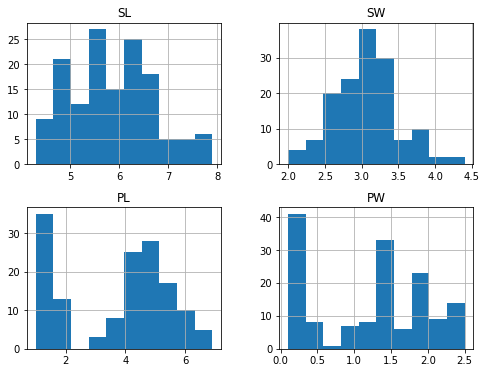

In [7]:
freq_data=idata.select_dtypes(include=['float64'])
freq_data.hist(figsize=(8,6))
plt.show()

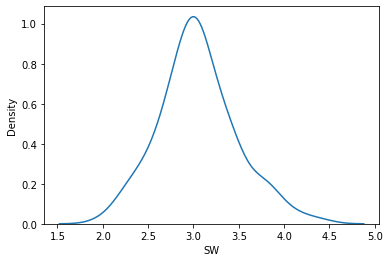

In [8]:
sns.kdeplot(idata['SW'])
plt.show()

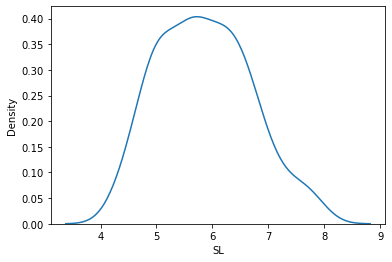

In [9]:
sns.kdeplot(idata['SL'])
plt.show()

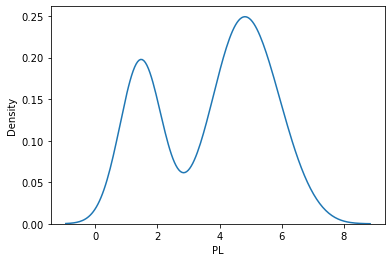

In [10]:
sns.kdeplot(idata['PL'])
plt.show()

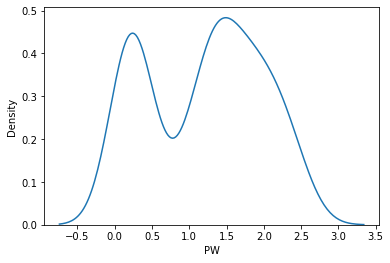

In [11]:
sns.kdeplot(idata['PW'])
plt.show()

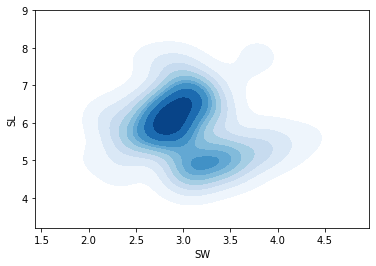

In [12]:
sns.kdeplot(x=idata['SW'],y=idata['SL'],cmap='Blues',shade=True)
plt.show()

C:\Users\sreer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SW', ylabel='Density'>

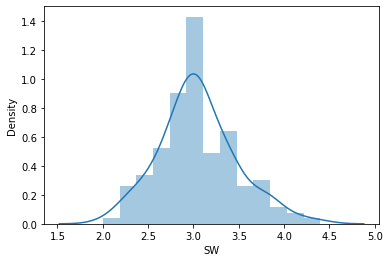

In [13]:
sns.distplot(idata['SW'])

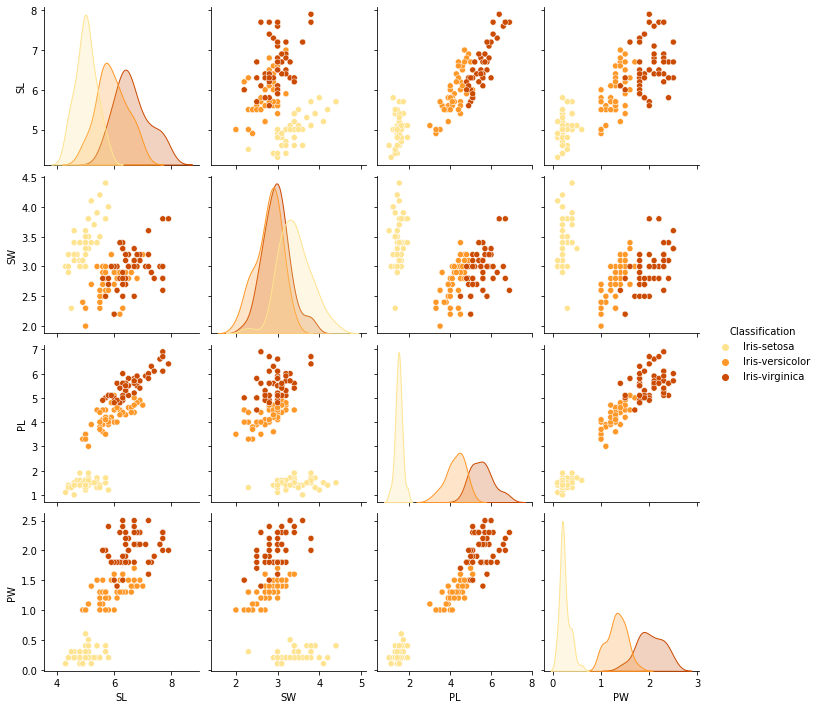

In [14]:
sns.pairplot(data=idata,hue='Classification',palette='YlOrBr')

#### Insights:
### * Iris-Setosa has low PL and PW .
### * Iris-Virginica has high PL and PW values.
### * Iris-Virginica has higher Sepal Length
### * Iris-Versicolor has average Petal length and petal width
### * PL and PW are bi-modes

In [15]:
# filling the missing values 
for x in ['SL','SW','PL']:
    idata[x]=idata[x].fillna(idata[x].median())


In [16]:
idata.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [17]:
# Checking for outliers

import warnings
warnings.filterwarnings('ignore') # removing the warningd

<AxesSubplot:xlabel='SL'>

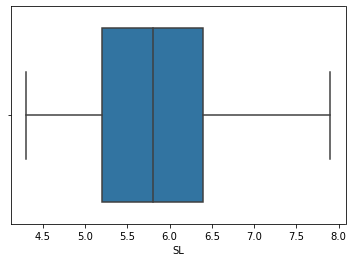

In [18]:
sns.boxplot(idata['SL'])

<AxesSubplot:xlabel='PL'>

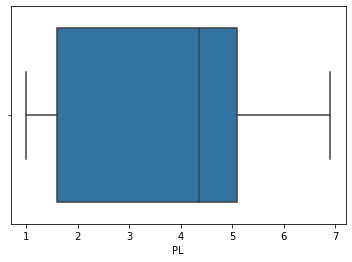

In [19]:
sns.boxplot(idata['PL'])

<AxesSubplot:xlabel='PW'>

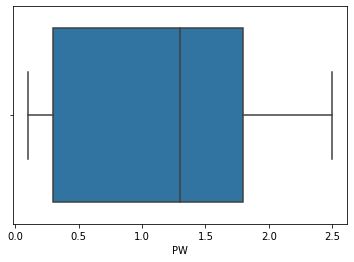

In [20]:
sns.boxplot(idata['PW'])

<AxesSubplot:xlabel='SW'>

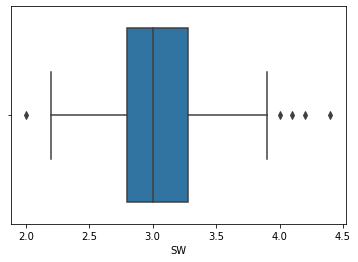

In [21]:
sns.boxplot(idata['SW'])


#### Outliers is present in SW.

In [22]:
# Handling outliers

In [23]:
q1=np.percentile(idata['SW'],25,interpolation='midpoint')
q3=np.percentile(idata['SW'],75,interpolation='midpoint')
print('Quartile1:',q1)
print('Quartile3:',q3)
print('*********************')
IQR=q3-q1
print("IQR :",round(IQR,5))
print('*********************')
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("Lower limit:",round(lower_limit,3))
print("Upper_limit:",round(upper_limit,3))


Quartile1: 2.8
Quartile3: 3.25
*********************
IQR : 0.45
*********************
Lower limit: 2.125
Upper_limit: 3.925


In [24]:
index=idata['SW'][(idata['SW']>upper_limit)|(idata['SW']<lower_limit)].index
print("The index values are:",index)
idata.drop(index,inplace=True)

The index values are: Int64Index([14, 15, 32, 33, 60], dtype='int64')


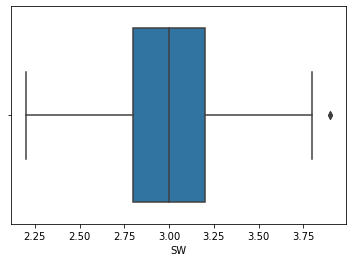

In [25]:
sns.boxplot(idata['SW'])
plt.show()



In [26]:
idata.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


<AxesSubplot:>

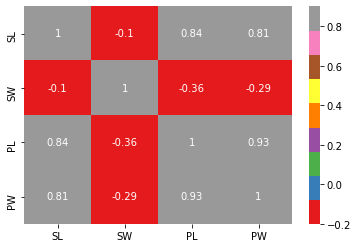

In [27]:
corr_matrix=idata.corr()
sns.heatmap(corr_matrix,vmin=-.2,vmax=0.9,annot=True,cmap='Set1')

#### SW has low correlation with PL,PW,SL

In [28]:
# splitting the data set

In [29]:
y=pd.DataFrame(idata['Classification'])
X=idata.drop(['Classification'],axis=1)


In [30]:
X.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y.head()

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [32]:
X.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [33]:
X.shape

(145, 4)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(116, 4)
(29, 4)
(116, 1)
(29, 1)


In [37]:
# Building model 

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [39]:
logrs_model=LogisticRegression(multi_class='multinomial')# setting multiclass to multinomial since we have three categories 
logrs_model.fit(X_train,y_train)
y_pred=logrs_model.predict(X_test)
x_pred=logrs_model.predict(X_train)
print("Accuracy",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred,average='macro'))
print('****************************************************')
print("F1 score training",f1_score(y_train,x_pred,average='macro'))
print("Accuracy on training data ",accuracy_score(x_pred,y_train))

Accuracy 0.9310344827586207
F1 score: 0.9326599326599326
****************************************************
F1 score training 0.9661088954395701
Accuracy on training data  0.9655172413793104


In [40]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
conf_mat

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,9,0,0
VERSICOLR,0,8,1
VIRGINICA,0,1,10


In [41]:
#Normalizing the data 
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)
X_train=pd.DataFrame(X_train,columns=['SL','SW','PL','PW'])
X_test=pd.DataFrame(X_test,columns=['SL','SW','PL','PW'])


In [42]:
logrsn_model=LogisticRegression(multi_class='multinomial')# setting multiclass to multinomial since we have three categories 
logrsn_model.fit(X_train,y_train)
y_pred=logrsn_model.predict(X_test)
x_pred=logrsn_model.predict(X_train)
print("Accuracy",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred,average='macro'))
print('****************************************************')
print("F1 score training",f1_score(y_train,x_pred,average='macro'))
print("Accuracy on training data ",accuracy_score(x_pred,y_train))

Accuracy 0.9310344827586207
F1 score: 0.9333333333333332
****************************************************
F1 score training 0.9578059071729959
Accuracy on training data  0.9568965517241379


In [43]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
conf_mat

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,9,0,0
VERSICOLR,0,9,0
VIRGINICA,0,2,9


## 2.KNN Algorithm

In [44]:
from sklearn.neighbors import KNeighborsClassifier  

In [45]:
acc_values=[]
acc1_values=[]
neighbor=np.arange(3,18)
for k in neighbor:
    k_model=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    k_model.fit(X_train,y_train)
    y_pred=k_model.predict(X_test)
    x_pred=k_model.predict(X_train)
    acc=accuracy_score(y_test,y_pred)
    acc1=accuracy_score(x_pred,y_train)
    acc_values.append(acc)
    acc1_values.append(acc1)

In [46]:
print(acc_values)
print('**************')
print("Training values",acc1_values)

[0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9310344827586207, 0.9655172413793104, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9655172413793104]
**************
Training values [0.9827586206896551, 0.9827586206896551, 0.9913793103448276, 0.9827586206896551, 0.9913793103448276, 0.9913793103448276, 0.9913793103448276, 0.9913793103448276, 0.9913793103448276, 0.9827586206896551, 0.9913793103448276, 0.9913793103448276, 0.9913793103448276, 0.9913793103448276, 0.9913793103448276]


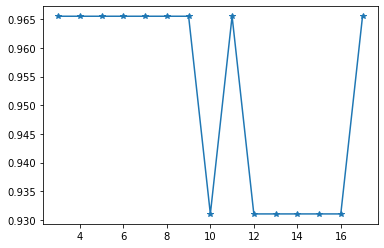

In [47]:
# finding 'k' values for which we have got the max accurate value 
plt.plot(neighbor,acc_values,'*-')
plt.show()

In [48]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
x_pred=classifier.predict(X_train)
acc=accuracy_score(y_pred,y_test)
acc1=accuracy_score(x_pred,y_train)

In [49]:
print(acc)
print("Training data Accuracy",acc1)

0.9655172413793104
Training data Accuracy 0.9913793103448276


In [90]:
print("F1 score",f1_score(y_test,y_pred,average='macro'))
print("precision",precision_score(y_test,y_pred,average='macro'))
print("recall score",recall_score(y_test,y_pred,average='macro'))

F1 score 0.9658994032395567
precision 0.9722222222222222
recall score 0.9629629629629629


In [91]:
print("f1 score",f1_score(x_pred,y_train,average='macro'))
print("precision",precision_score(x_pred,y_train,average='macro'))
print("recall score",recall_score(x_pred,y_train,average='macro'))

f1 score 0.991555769333547
precision 0.9914529914529915
recall score 0.991869918699187


In [52]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
conf_mat

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,9,0,0
VERSICOLR,0,8,1
VIRGINICA,0,0,11


## SVM linear

In [53]:
from sklearn.svm import SVC

In [54]:
svm_model_lin=SVC(kernel='linear')

In [55]:
svm_model_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
y_predt=svm_model_lin.predict(X_test)
print("Accuracy",accuracy_score(y_pred,y_test))
print("F1 score",f1_score(y_pred,y_test,average='macro'))

Accuracy 0.9655172413793104
F1 score 0.9658994032395567


## Polynomial SVM 

In [57]:
svm_poly=SVC(kernel='poly',degree=2)

In [58]:
svm_poly.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [59]:
y_pred=svm_poly.predict(X_test)

In [60]:
print("F1 score",f1_score(y_pred,y_test,average='macro'))
print("Accuracy",accuracy_score(y_pred,y_test))

F1 score 0.9658994032395567
Accuracy 0.9655172413793104


In [61]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
conf_mat

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,9,0,0
VERSICOLR,0,8,1
VIRGINICA,0,0,11


## Radial SVM

In [62]:
svm_radial=SVC(kernel='rbf',random_state=1)

In [63]:
svm_radial.fit(X_train,y_train)

SVC(random_state=1)

In [64]:
y_pred=svm_radial.predict(X_test)

In [65]:
print("F1 score",f1_score(y_pred,y_test,average='macro'))
print("Accuracy",accuracy_score(y_pred,y_test))

F1 score 0.9658994032395567
Accuracy 0.9655172413793104


## Dceision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model=DecisionTreeClassifier()

In [68]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred=dt_model.predict(X_test)

In [70]:
print("F1 score",f1_score(y_pred,y_test,average='macro'))

F1 score 0.9665831244778613


## Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc_model=RandomForestClassifier()

In [73]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred=rfc_model.predict(X_test)

In [75]:
print("F1_score",f1_score(y_pred,y_test,average='macro'))

F1_score 0.9658994032395567


In [76]:
print("Accuracy",accuracy_score(y_pred,y_test))

Accuracy 0.9655172413793104


In [77]:
pd.Series(rfc_model.feature_importances_,index=X.columns).sort_values(ascending=False)*100

PW    53.177939
PL    36.249483
SL     9.023845
SW     1.548732
dtype: float64

In [78]:
y1=pd.DataFrame(idata['Classification'])
X1=idata.drop(['Classification','SW'],axis=1)

In [79]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,random_state=1,test_size=.2)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(116, 3)
(29, 3)
(116, 1)
(29, 1)


In [80]:
rf_model=RandomForestClassifier()

In [81]:
rf_model.fit(X1_train,y1_train)

RandomForestClassifier()

In [82]:
y1_pred=rf_model.predict(X1_test)
print(f1_score(y1_test,y1_pred,average='macro'))
print(accuracy_score(y1_test,y1_pred))

1.0
1.0


In [83]:
threshold=0.5
y1_pred_proba=rf_model.predict_proba(X1_test)[:,1]
y1_pred=(y1_pred_proba>threshold).astype(int)

In [84]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [85]:
# fine tuning of hyper parameter

In [86]:
rft_tuning=RandomForestClassifier(bootstrap=True,n_estimators=500,max_depth=10,criterion='entropy',random_state=8)

In [87]:
rft_tuning.fit(X1_train,y1_train)
y1_pred=rft_tuning.predict(X1_test)
print("F1_score",f1_score(y1_test,y1_pred,average='macro'))
print("Accuracy",accuracy_score(y1_test,y1_pred))

F1_score 1.0
Accuracy 1.0


In [88]:
x1_pred=rft_tuning.predict(X1_train)

In [89]:
f1_score(x1_pred,y1_train,average='macro')

1.0